<div style="background-color: #FFC300; text-align: center; padding: 40px; border-radius: 8px;">
        <h1 style="color: #393a19; margin: 0;  font-size: 40px; font-family: cursive;">Sentiment Analysis using NLP</h1>
    </div>

<div style="background-color: #333; text-align: center; padding: 10px; border-radius: 8px;">
        <h1 style="color: #fff; margin: 0;  font-size: 20px; font-family: cursive;">The Objective Of this Project is to find the Hate Speech in the tweets Using the NLP Pipelining</h1>
</div>

In [39]:
# importing the libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import re 
import string
import nltk
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset 

In [40]:
df = pd.read_csv("C:\\Users\\nex20\\Downloads\\Twitter Sentiments.csv")

In [41]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [42]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [43]:
df['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


<div style="background-color: #333; text-align: center; padding: 10px; border-radius: 8px;">
        <h1 style="color: #fff; margin: 0;  font-size: 20px; font-family: cursive;"> Preprocessing</h1>
</div>

In [45]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [46]:
# remove twitter handles (@user)
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [47]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [48]:
# remove special characters like numbers and punctuations 

df['tweet'] = df['tweet'].str.replace('[^a-zA-Z#]', ' ')

# Function to remove non-ASCII and unwanted Unicode characters
def remove_unicode(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters

# Apply the function to the 'tweet' column
df['tweet'] = df['tweet'].apply(remove_unicode)


In [49]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [50]:
df['tweet'][4]

' factsguide: society now    #motivation'

In [51]:
# removing short words

df['tweet'] = df['tweet'].apply(lambda x : " ".join([w for w in x.split() if len(w) > 3]))

In [52]:
df['tweet'][1]

"thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked"

In [53]:
# tokenization ( indivisual words known as tokens)

tokenized_tweet = df['tweet'].apply(lambda x : x.split())
tokenized_tweet.head()


0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3              [#model, love, take, with, time, ur!!!]
4                  [factsguide:, society, #motivation]
Name: tweet, dtype: object

In [54]:
# stemming (stem the words) running -> run , form same form of verb making simple common word 

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence : [stemmer.stem(word) for word in sentence])

In [55]:
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3              [#model, love, take, with, time, ur!!!]
4                       [factsguide:, societi, #motiv]
Name: tweet, dtype: object

In [56]:
# combine into single string or word 

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

In [57]:
df['tweet'] = tokenized_tweet

In [58]:
df.head()

,id,label,tweet
0,1,0,when father dysfunct selfish drag kid into dys...
1,2,0,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesti
3,4,0,#model love take with time ur!!!
4,5,0,factsguide: societi #motiv


<div style="background-color: #333; text-align: center; padding: 10px; border-radius: 8px;">
        <h1 style="color: #fff; margin: 0;  font-size: 20px; font-family: cursive;"> EDA</h1>
</div>

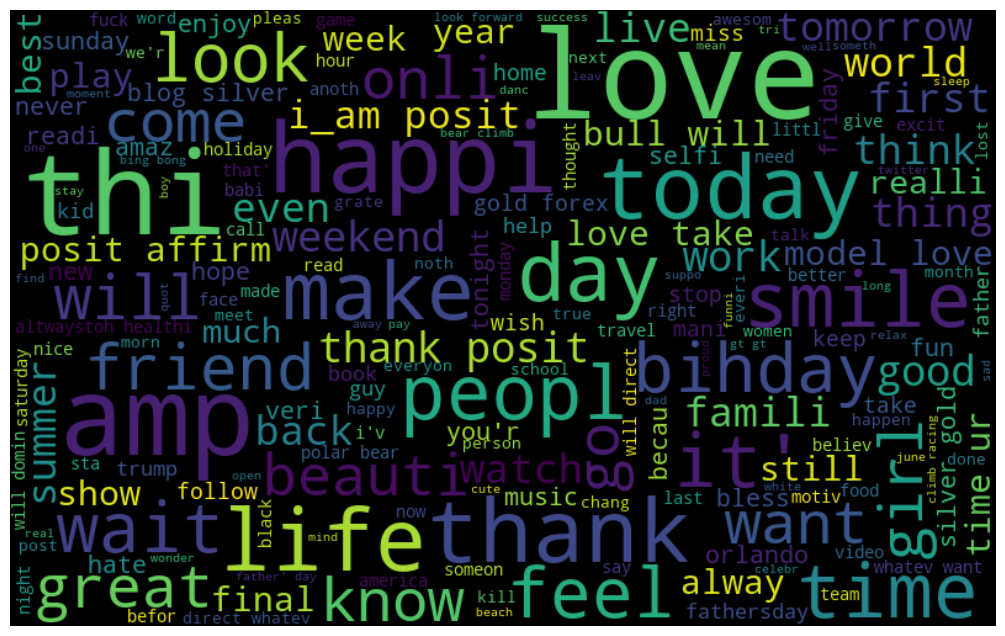

In [59]:
# vizualize words in tweets 

all_words = " ".join([sentence for sentence in df['tweet']])
# print(all_words[:200])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plotting 
plt.figure(figsize= (15 , 8))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.show()

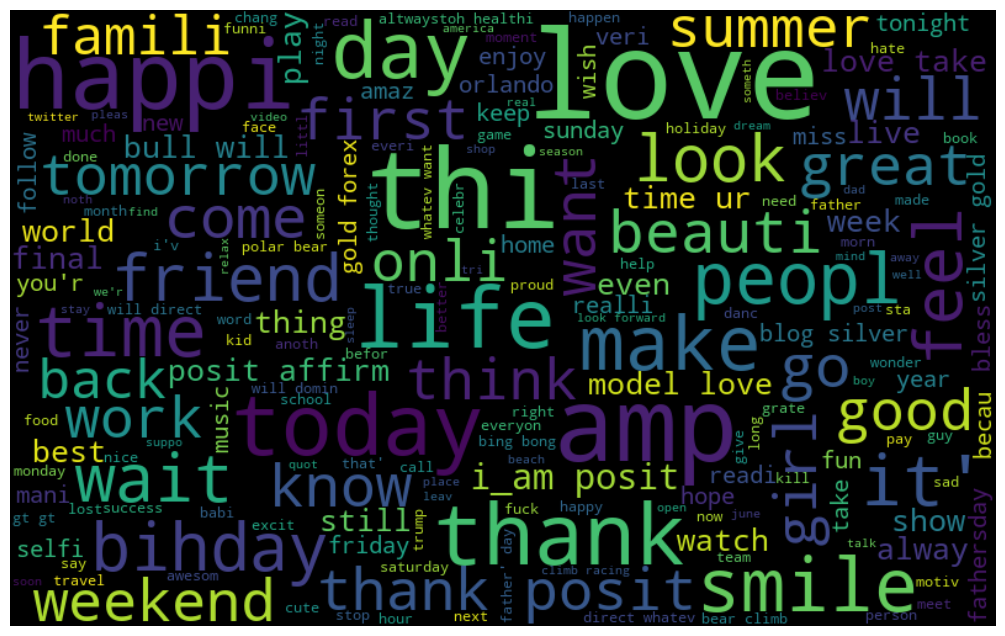

In [60]:
# vizualize words for +ve tweets 

all_words = " ".join([sentence for sentence in df['tweet'][df['label'] == 0]])
# print(all_words[:200])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plotting 
plt.figure(figsize= (15 , 8))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.show()

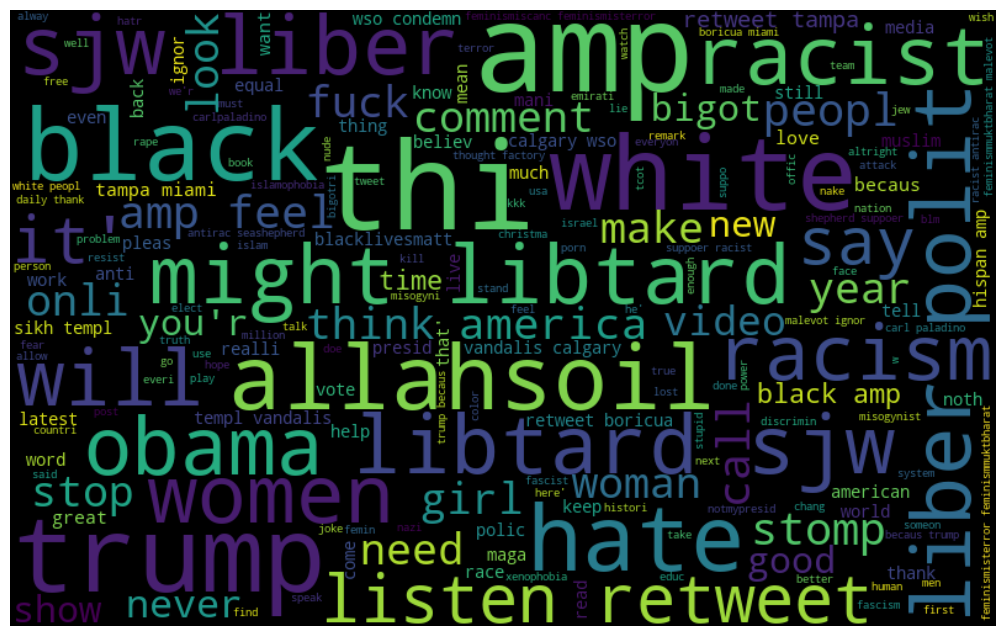

In [61]:
# vizualize words for -ve tweets 

all_words = " ".join([sentence for sentence in df['tweet'][df['label'] == 1]])
# print(all_words[:200])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plotting 
plt.figure(figsize= (15 , 8))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
# extract the hashtags 

def hashtag_extract(texts):
    hashtags = []
    for text in texts:
        # Find all hashtags in the text using regex
        hashtags.extend(re.findall(r"#(\w+)", text))
    return hashtags

In [63]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [64]:
# hashtags from +ve tweets non racist etc 
ht_positive = hashtag_extract(df['tweet'][df['label'] == 0])
# hashtags from -ve tweets non racist etc 
ht_negative = hashtag_extract(df['tweet'][df['label'] == 1])

In [65]:
ht_positive[:6]

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv']

In [66]:
# creating dataframe for positive hastags and their counts 

In [67]:
freq1 = nltk.FreqDist(ht_positive)

d1 = pd.DataFrame({'hashtag' : list(freq1.keys()) , 
                  'count' : list(freq1.values())})

In [68]:
d1.head()

,hashtag,count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [69]:
d1 = d1.nlargest(columns= 'count' , n = 10)
fig = px.histogram(d1 , x = d1['hashtag'] , y = d1['count'])
fig.update_layout(
    height = 800
)
fig.show()

In [70]:
# creating dataframe for positive hastags and their counts 

In [71]:
freq2 = nltk.FreqDist(ht_negative)

d2 = pd.DataFrame({'hashtag' : list(freq2.keys()) , 
                  'count' : list(freq2.values())})

In [72]:
d2.head()

,hashtag,count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


In [73]:
d2 = d2.nlargest(columns= 'count' , n = 10)
fig = px.histogram(d2 , x = d2['hashtag'] , y = d2['count'])
fig.update_layout(
    height = 800
)
fig.show()

<div style="background-color: #333; text-align: center; padding: 10px; border-radius: 8px;">
        <h1 style="color: #fff; margin: 0;  font-size: 20px; font-family: cursive;"> Feature Selection </h1>
</div>

### bag of words 

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df= 0.99 , min_df = 2 , max_features=10000 , stop_words='english')

In [75]:
bow = bow_vectorizer.fit_transform(df['tweet'])

In [76]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<div style="background-color: #333; text-align: center; padding: 10px; border-radius: 8px;">
        <h1 style="color: #fff; margin: 0;  font-size: 20px; font-family: cursive;"> Train Test Split </h1>
</div>

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    bow, df['label'], test_size=0.20, random_state=2)

<div style="background-color: #333; text-align: center; padding: 10px; border-radius: 8px;">
        <h1 style="color: #fff; margin: 0;  font-size: 20px; font-family: cursive;"> Models</h1>
</div>

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , f1_score

In [79]:
# logistic regression

In [80]:
lr = LogisticRegression()
#training 
lr.fit(X_train , y_train)
y_pred_lr = lr.predict(X_test)
#
print(y_pred_lr)
print("{}".format(classification_report(y_test , y_pred_lr)))
print((confusion_matrix(y_test , y_pred_lr)))
print("accuracy score :" , accuracy_score(y_test , y_pred_lr))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5917
           1       0.88      0.51      0.65       476

    accuracy                           0.96      6393
   macro avg       0.92      0.75      0.81      6393
weighted avg       0.96      0.96      0.95      6393

[[5882   35]
 [ 231  245]]
accuracy score : 0.9583919912404192


In [81]:
# random forest 

In [82]:
rf = RandomForestClassifier()
#training 
rf.fit(X_train , y_train)
y_pred_rf = rf.predict(X_test)
#testing 
print(y_pred_rf)
print("{}".format(classification_report(y_test , y_pred_rf)))
print((confusion_matrix(y_test , y_pred_rf)))
print("accuracy score :" , accuracy_score(y_test , y_pred_rf))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5917
           1       0.79      0.52      0.63       476

    accuracy                           0.95      6393
   macro avg       0.87      0.75      0.80      6393
weighted avg       0.95      0.95      0.95      6393

[[5850   67]
 [ 228  248]]
accuracy score : 0.9538557797591115


In [83]:
# naive bayes 

In [84]:
# Ensure the data is dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize and train the GaussianNB model
nb = GaussianNB()
nb.fit(X_train_dense, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_dense)

# Evaluation
print(y_pred_nb)
print("Classification Report:\n{}".format(classification_report(y_test, y_pred_nb)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_nb))

[0 0 0 ... 0 0 0]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5917
           1       0.24      0.68      0.35       476

    accuracy                           0.81      6393
   macro avg       0.60      0.75      0.62      6393
weighted avg       0.92      0.81      0.85      6393

Confusion Matrix:
 [[4879 1038]
 [ 152  324]]
Accuracy Score: 0.8138589081808227


# logistic regression gives best results so we will use it to find our predictions based on probabilities 

In [140]:
prediction = lr.predict_proba(X_test)
pred = prediction[: , 1 ] > 0.5
pred = pred.astype(int)

In [141]:
f1_score(y_test , pred)

0.6481481481481481

In [142]:
accuracy_score(y_test , pred)

0.9583919912404192

In [143]:
prediction[0]

array([0.99080916, 0.00919084])

In [144]:
prediction[100]

array([0.99391381, 0.00608619])

In [145]:
prediction[777]

array([0.99244451, 0.00755549])

In [151]:
prediction[167][1] > 0.5

False